In [1]:

import pandas as pd 
import statistics
import seaborn as sns
import numpy as np #for summary statistics 
import matplotlib.pyplot as plt #for plotting 
from scipy.stats import ttest_ind #for statistical significance tests 
from scipy.stats import sem # for standard error


In [2]:
## Load the data

Data1 = pd.read_csv('StateHospAllUSA.csv')
Data1

Data2 =pd.read_csv('USHospitalData.csv')
Data2


/shared/centos7/anaconda3/CPS-10-2021/envs/CPS_10_2021/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,hospital_data_id,fiscal_yr,data_ein,data_name,form_990_filed_part_grp_ret_f,form_990_num_fac_oper,form_990_name,form_990_address,form_990_city,...,pctttlexp_econdevlp,pctttlexp_cmntysuprt,pctttlexp_envrnimprv,pctttlexp_ldrdevlp,pctttlexp_cltnbldg,pctttlexp_htlhimprvadvcy,pctttlexp_wrkfrcdevlp,pctttlexp_other,pctttlexp_total,updated_dt
0,0,1,2010,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
1,1,2,2011,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
2,2,3,2012,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
3,3,4,2013,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 N Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
4,4,5,2014,630307951,Mizell Memorial Hospital,N,1,Mizell Memorial Hospital,702 North Main Street,Opp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,5,29782,2015,830300467,Powell Valley Hospital,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29122,6,29783,2016,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29123,7,29784,2017,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"
29124,8,29785,2018,830300467,Powell Valley Health Care,N,1,Powell Valley Health Care Inc,777 Avenue H,Powell,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,"October 7, 2022"


In [3]:
dfJoin = Data1.merge(Data2, how='inner', left_on='ein', right_on='data_ein')

### Question 1: Is there a relation between community building spending within rural & urban location (t-test) between NY and ME? 


In [4]:

values= ['NY']
dfJoin_NY = dfJoin[dfJoin['state'].isin(values)]

values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]

# T test: "comm_bldg_actvs" community bld

comm_bldg_actvs_ME=dfJoin_ME['comm_bldg_actvs']
comm_bldg_actvs_NY=dfJoin_NY['comm_bldg_actvs']

In [66]:
res = ttest_ind(comm_bldg_actvs_ME, comm_bldg_actvs_NY)
print(f'\n Significance Test:\n')
print(res)


 Significance Test:

Ttest_indResult(statistic=-2.354495436383824, pvalue=0.018629311891835552)


Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY. 
The P-value for this describes that how likely you are to have found  this if the nulll hypothesis were true. So, P values used in hypothesis testing to help decide whether to reject the null hypothesis.
The smaller P-value (less than sigificance level) the more likely you are to reject the null hypothesis, and accept the alternative hypthesis. 
As we can see the  p value for this test is significant(statistic=-2.354495436383824, pvalue=0.018629311891835552), < 0.05 which means that we reject the null hypothesis and accept the alternative hypothesis

### Question 2: What are the range and average spending by the hospital on each community benefit, community building, and community health improvement advocacy activities? Test for statistical significance between each one of those measures among ME  and NY (total and by location: rural & urban)

In [6]:
values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]
#print(statistical.groupby('state').var()
statistical.describe()

,tot_comm_bnfts,comm_bldg_actvs,comm_bldg_actvs_htlhimprvadvcy
count,2.364000e+03,2.364000e+03,2.364000e+03
mean,6.444693e+07,1.587689e+05,3.356654e+04
std,1.168738e+08,3.997343e+05,1.436165e+05
min,-2.293448e+07,0.000000e+00,0.000000e+00
25%,5.246018e+06,0.000000e+00,0.000000e+00
50%,1.641713e+07,0.000000e+00,0.000000e+00
75%,6.336856e+07,9.342600e+04,0.000000e+00
max,1.059075e+09,3.814145e+06,2.055502e+06


Get the range and average spending:

Total Community Benefit: 
Min: -2.293448e+07 
Max: 1.059075e+09

Community building activities:
Min: 0.000000e+00
Max: 3.814145e+06

Community health improvement advocacy:
Min: 0.000000e+00
Max: 2.055502e+06

In [7]:
# Test for statistical siginficance of each of these for both states:

values= ['ME']
dfJoin_ME = dfJoin_New[dfJoin_New['state'].isin(values)]
values= ['NY']
dfJoin_NY = dfJoin_New[dfJoin_New['state'].isin(values)]

#
values= ['Y']
dfJoin_NY_Urban = dfJoin_NY[dfJoin_NY['urban_location_f'].isin(values)]
dfJoin_ME_Urban = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(values)]
#
values= ['N']
dfJoin_NY_Rural= dfJoin_NY[dfJoin_NY['urban_location_f'].isin(values)]
dfJoin_ME_Rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(values)]

In [67]:
comm_bldg_actvs_ME=dfJoin_ME['comm_bldg_actvs']
comm_bldg_actvs_NY=dfJoin_NY['comm_bldg_actvs']

res2 = ttest_ind(comm_bldg_actvs_ME, comm_bldg_actvs_NY)
print(f'\n Significance Test:\n')
print(res2)


 Significance Test:

Ttest_indResult(statistic=-2.354495436383824, pvalue=0.018629311891835552)


Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY.
As we can see the  p value for this test is significant(statistic=-2.354495436383824, pvalue=0.018629311891835552),
which means that we reject the null hypothesis and accept the alternative hypothesis 

In [142]:
## compare between urban vs urban, rural vs. rural 

comm_bldg_actvs_ME_Urban=dfJoin_ME_Urban['comm_bldg_actvs']
comm_bldg_actvs_NY_Urban=dfJoin_NY_Urban['comm_bldg_actvs']

res3 = ttest_ind(comm_bldg_actvs_ME_Urban, comm_bldg_actvs_NY_Urban)
print(f'\n Significance Test:\n')
print(res3)


 Significance Test:

Ttest_indResult(statistic=-0.5731014467328475, pvalue=0.566646767227916)


Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY. 
As we can see the  p value for this test is not significant(statistic=-0.5731014467328475, pvalue=0.566646767227916), which means that we dont reject the null hypothesis 

In [69]:
## compare between urban vs urban, rural vs. rural  

comm_bldg_actvs_ME_Rural=dfJoin_ME_Rural['comm_bldg_actvs']
comm_bldg_actvs_NY_Rural=dfJoin_NY_Rural['comm_bldg_actvs']

res4 = ttest_ind(comm_bldg_actvs_ME_Rural, comm_bldg_actvs_NY_Rural)
print(f'\n Significance Test:\n')
print(res4)



 Significance Test:

Ttest_indResult(statistic=-0.8375210223465105, pvalue=0.40267096868816044)


Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY. 
As we can see the  p value for this test is not significant(statistic=-0.8375210223465105, pvalue=0.40267096868816044), which means that we don't reject the null hypothesis

In [13]:
comm_bldg_actvs_htlhimprvadvcy_ME=dfJoin_ME['comm_bldg_actvs_htlhimprvadvcy']
comm_bldg_actvs_htlhimprvadvcy_NY=dfJoin_NY['comm_bldg_actvs_htlhimprvadvcy']

res5 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_ME, comm_bldg_actvs_htlhimprvadvcy_NY)
print(f'\n Significance Test:\n')
print(res5)


 Significance Test:

Ttest_indResult(statistic=0.5504249646114053, pvalue=0.5820799787752249)


Null hypothesis (H_0): There is no difference in Community health improvement advocacy  between states ME and NY. 
As we can see the  p value for this test is NOT SIGNIFICANT(statistic=0.5504249646114053, pvalue=0.5820799787752249), which means that we not reject the null hypothesis
because the diference in the means is by chance

In [145]:
comm_bldg_actvs_htlhimprvadvcy_ME_Rural=dfJoin_ME_Rural['comm_bldg_actvs_htlhimprvadvcy'] 
comm_bldg_actvs_htlhimprvadvcy_NY_Rural=dfJoin_NY_Rural['comm_bldg_actvs_htlhimprvadvcy']

res6 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_ME_Rural, comm_bldg_actvs_htlhimprvadvcy_NY_Rural)
print(f'\n Significance Test:\n')
print(res6)


 Significance Test:

Ttest_indResult(statistic=4.291982060604571, pvalue=2.0997921160461246e-05)


Null hypothesis (H_0): There is no difference in Community health improvement advocacy  between states ME and NY. As we can see the  p value for this test is  SIGNIFICANT(statistic=4.291982060604571, pvalue=2.0997921160461246e-05), which means that we reject the null hypothesis and accept the alternative hypothesis

In [16]:
comm_bldg_actvs_htlhimprvadvcy_ME_Urban=dfJoin_ME_Urban['comm_bldg_actvs_htlhimprvadvcy']  
comm_bldg_actvs_htlhimprvadvcy_NY_Urban=dfJoin_NY_Urban['comm_bldg_actvs_htlhimprvadvcy']

res7 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_ME_Urban, comm_bldg_actvs_htlhimprvadvcy_NY_Urban)
print(f'\n Significance Test:\n')
print(res7)


 Significance Test:

Ttest_indResult(statistic=-2.709480955176514, pvalue=0.00680202065892289)


Null hypothesis (H_0): There is no difference in Community health improvement advocacy  between states ME and NY. As we can see the  p value for this test is  SIGNIFICANT(statistic=-2.709480955176514, pvalue=0.00680202065892289), which means that we reject the null hypothesis and accept the alternative hypothesis

In [17]:
tot_comm_bnfts_ME=dfJoin_ME['tot_comm_bnfts']
tot_comm_bnfts_NY=dfJoin_NY['tot_comm_bnfts']
res8 = ttest_ind(tot_comm_bnfts_ME, tot_comm_bnfts_NY)
print(f'\n Significance Test:\n')
print(res8)


 Significance Test:

Ttest_indResult(statistic=-8.234841616423378, pvalue=2.939705912855892e-16)


Null hypothesis (H_0): There is no difference in tot_comm_bnfts between states ME and NY. As we can see the  p value for this test is significant(statistic=-8.234841616423378, pvalue=2.939705912855892e-16), which means that we reject the null hypothesis and accept the alternative hypothesis.

Alternagtive Hypothesis (H_A or H_1): There is difference in Total community benefits between ME and NY


In [18]:
tot_comm_bnfts_ME_Rural=dfJoin_ME_Rural['tot_comm_bnfts']
tot_comm_bnfts_NY_Rural=dfJoin_NY_Rural['tot_comm_bnfts']
res9 = ttest_ind(tot_comm_bnfts_ME_Rural, tot_comm_bnfts_NY_Rural)
print(f'\n Significance Test:\n')
print(res9)


 Significance Test:

Ttest_indResult(statistic=-4.449522657420215, pvalue=1.0461013217956718e-05)


Null hypothesis (H_0): There is no difference in tot_comm_bnfts between states ME and NY. As we can see the  p value for this test is significant(statistic=-4.449522657420215, pvalue=1.0461013217956718e-05), which means that we reject the null hypothesis and accept the alternative hypothesis, 

Alternagtive Hypothesis (H_A or H_1): There is difference in Total community benefits between ME and NY

In [70]:
tot_comm_bnfts_ME_Urban=dfJoin_ME_Urban['tot_comm_bnfts']
tot_comm_bnfts_NY_Urban=dfJoin_NY_Urban['tot_comm_bnfts']
res10 = ttest_ind(tot_comm_bnfts_ME_Urban, tot_comm_bnfts_NY_Urban)
print(f'\n Significance Test:\n')
print(res10)


 Significance Test:

Ttest_indResult(statistic=-5.071657976486527, pvalue=4.3448812970845927e-07)


Null hypothesis (H_0): There is no difference in tot_comm_bnfts between states ME and NY. As we can see the  p value for this test is significant(statistic=-5.071657976486527, pvalue=4.3448812970845927e-07), which means that we reject the null hypothesis and accept the alternative hypothesis

Alternagtive Hypothesis (H_A or H_1): There is difference in Total community benefits between ME and NY

#### Question 3: What is the percentage of spend on each activity type of the overall budget? Notice we have 3 activity types (measures) between Maine and New York 

We calculate percentage of each of spending Community building activities, Total community benefits and Community health improvement advocacy over total revenue , below you see some calculation for these activities 

In [115]:
## calculate the percentage for ME
'tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy'
(dfJoin_ME['tot_comm_bnfts'].sum()/dfJoin_ME['tot_revenue'].sum())*100
# I choose tot_comm_bnfts column to sum it up and devided to sum of total revenue, we have 7.66% 

7.663181840182556

In [116]:
(dfJoin_ME['comm_bldg_actvs'].sum()/dfJoin_ME['tot_revenue'].sum())*100
# I choose comm_bldg_actvs column to sum it up and devided to sum of total revenue, we have 0.05% 

0.05630542161730728

In [117]:
(dfJoin_ME['comm_bldg_actvs_htlhimprvadvcy'].sum()/dfJoin_ME['tot_revenue'].sum())*100
# I choose comm_bldg_actvs_htlhimprvadvcy column to sum it up and devided to sum of total revenue, we have 0.019% 

0.01934286533252013

In [118]:
# calculate the percentage of spending for NY
(dfJoin_NY['tot_comm_bnfts'].sum()/dfJoin_NY['tot_revenue'].sum())*100
# I choose tot_comm_bnfts column to sum it up and devided to sum of total revenue, we have 11% 

11.1475304323509

In [119]:
(dfJoin_NY['comm_bldg_actvs'].sum()/dfJoin_NY['tot_revenue'].sum())*100
# I choose comm_bldg_actvs column to sum it up and devided to sum of total revenue, we have 0.025% 

0.025711128060902172

In [120]:
(dfJoin_NY['comm_bldg_actvs_htlhimprvadvcy'].sum()/dfJoin_NY['tot_revenue'].sum())*100
# I choose comm_bldg_actvs_htlhimprvadvcy column to sum it up and devided to sum of total revenue, we have 0.005% 

0.0050876599805515154

#### Question 4:What is the percentage of spend on each activity type of the overall budget among both states? Same calculated % as above 



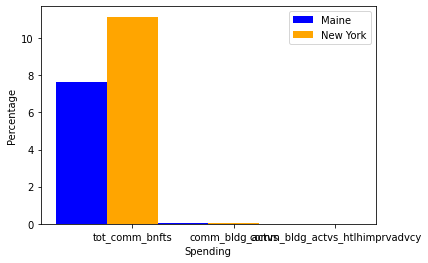

In [130]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(3)
y1 = [7.663181840182556, 0.05630542161730728, 0.01934286533252013]
y2 = [ 11.1475304323509, 0.025711128060902172,0.0050876599805515154]
width = 0.5
  
# plot data in grouped manner of bar type
plt.bar(x-0.5, y1, width, color='blue')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy'])
plt.xlabel("Spending")
plt.ylabel("Percentage")
plt.legend(["Maine", "New York"])
plt.show()

#### Question 5:  Is variation in the amount of spending (all three measures: community benefit, community building, and community health improvement advocacy activities ) between urban and rural hospitals significant? For NY and ME, you are comparing; calculate variance & coefficient of variation for each sample


In [20]:
# We need to compute the F-test 
import scipy.stats

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    x = np.array(group1)
    y = np.array(group2)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun) ## Find the p value of F-test
    return f, p_value

Calculate the variance for Maine and New York


In [21]:
values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]

print(statistical.groupby('state').var())

       tot_comm_bnfts  comm_bldg_actvs  comm_bldg_actvs_htlhimprvadvcy
state                                                                 
ME       8.134304e+14     1.500826e+11                    4.069325e+10
NY       1.521695e+16     1.609377e+11                    1.752200e+10


In [22]:
# Define function for calucating coefficient of variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [23]:
values= ['NY']
dfJoin_NYc = dfJoin[dfJoin['state'].isin(values)]
dfJoin_NYcv = dfJoin_NYc[['tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]
cv(dfJoin_NYcv)

tot_comm_bnfts                    170.990180
comm_bldg_actvs                   241.098065
comm_bldg_actvs_htlhimprvadvcy    402.031180
dtype: float64

Coefficent variance for NY

Total community benefits: 170.990180

Community building activities: 241.098065

Community health improvement advocacy: 402.031180

In [24]:
values= ['ME']
dfJoin_MEc = dfJoin[dfJoin['state'].isin(values)]
dfJoin_MEcN = dfJoin_MEc[['tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]
## Coefficent variance for ME
cv(dfJoin_MEcN)

tot_comm_bnfts                    190.999644
comm_bldg_actvs                   353.099012
comm_bldg_actvs_htlhimprvadvcy    535.207084
dtype: float64

Coefficent variance for Maine

Total community benefits: 190.999644

Community building activities: 353.099012

Community health improvement advocacy: 535.207084

#### Conclusion: Coefficent varation of all these three meaures are higher for Maine compared to New York. 

In [25]:
# Calculate F test

values= ['NY']
dfJoin_NY = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]

values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]

# 1st F-test

f_test(dfJoin_ME[['tot_comm_bnfts']],dfJoin_NY[['tot_comm_bnfts']])



(tot_comm_bnfts    0.053456
 dtype: float64,
 array([1.]))

Null hypothesis (H_0): There is no difference in total Community benefits between states ME and NY. 
As we can see the  p value for this test is not significant(f-test: 0.053456 pvalue=1.), which means that we don't reject the null hypothesis

Coefficient of variation for Total community benefits: 0.053456

In [28]:
# Second F test
f_test(dfJoin_ME[['comm_bldg_actvs']],dfJoin_NY[['comm_bldg_actvs']])

(comm_bldg_actvs    0.932551
 dtype: float64,
 array([0.78523817]))

Null hypothesis (H_0): There is no difference in Community building activities between states ME and NY. 
As we can see the  p value for this test is not significant(f-test: 0.932551 pvalue=0.78523817), which means that we don't reject the null hypothesis

In [29]:
# Third F test
f_test(dfJoin_ME[['comm_bldg_actvs_htlhimprvadvcy']],dfJoin_NY[['comm_bldg_actvs_htlhimprvadvcy']])

(comm_bldg_actvs_htlhimprvadvcy    2.322409
 dtype: float64,
 array([1.11022302e-16]))

Null hypothesis (H_0): There is no difference in Community health improvement advocacy between states ME and NY. 
As we can see the  p value for this test is significant(f-test: 2.322409 pvalue=1.11022302e-16), which means that we reject the null hypothesis, and accept the alternative hypothesis.

#### Question 6: Are the difference in the mean for those spending significant between states (comparing urban areas for each state and rural area for each state? Each measure by the urban flag needs to be  tested between the two states you are comparing (6 t-test)

In [20]:
# similiar question 2


#### Question 7: Is variation in the percentage of spending between urban and rural hospitals significant? Also, calculate the t-test for each of those measures by urban flag (4 t-tests); use those measures  comm_bldg_actvs_tot_func_exp_pct  &  comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct; calculate variance & coefficient of variation for each sample.

In [36]:
## Compute F test
f_test(dfJoin_NY_Rural[['comm_bldg_actvs_tot_func_exp_pct']],dfJoin_NY_Urban[['comm_bldg_actvs_tot_func_exp_pct']])

(comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct    1.0
 dtype: float64,
 array([0.5]))

Null hypothesis (H_0): There is no difference in Community building activities as % of total functional expenses between Urban and Rural in New York. 
As we can see the  p value for this test is not significant(f-test: 1.0 pvalue=0.5), which means that we don't reject the null hypothesis

In [71]:
f_test(dfJoin_NY_Rural[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']],dfJoin_NY_Urban[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']])

(comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct    0.367892
 dtype: float64,
 array([1.]))

Null hypothesis (H_0): There is no difference in Community health improvement services and community benefit operations as % of total functional expenses between Urban and Rural in New York. 
As we can see the  p value for this f- test is not significant(f-test: 0.367892 pvalue=1.), which means that we don't reject the null hypothesis

In [74]:
# First T-test

res11 = ttest_ind(dfJoin_NY_Rural[['comm_bldg_actvs_tot_func_exp_pct']], dfJoin_ME_Rural[['comm_bldg_actvs_tot_func_exp_pct']])
print(f'\n Significance Test:\n')
print(res11)


 Significance Test:

Ttest_indResult(statistic=array([1.44574932]), pvalue=array([0.1488287]))


Null hypothesis (H_0): There is no difference in Community building activities as % of total functional expenses between New York and Maine in Rural area. 
As we can see the  p value for this t-test is not significant(statistic=1.44574932, pvalue=0.1488287), which means that we don't reject the null hypothesis

In [77]:
# Second T-test
res12 = ttest_ind(dfJoin_NY_Urban[['comm_bldg_actvs_tot_func_exp_pct']], dfJoin_ME_Urban[['comm_bldg_actvs_tot_func_exp_pct']])
print(f'\n Significance Test:\n')
print(res12)


 Significance Test:

Ttest_indResult(statistic=array([1.15864477]), pvalue=array([0.24675293]))


Null hypothesis (H_0): There is no difference in Community building activities as % of total functional expenses between New York and Maine in Urban area. 
As we can see the  p value for this t-test is not significant(statistic=1.15864477, pvalue=0.24675293), which means that we don't reject the null hypothesis 

In [76]:
# Third T-test
res13 = ttest_ind(dfJoin_NY_Urban[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']], dfJoin_ME_Urban[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']])
print(f'\n Significance Test:\n')
print(res13)


 Significance Test:

Ttest_indResult(statistic=array([2.20077099]), pvalue=array([0.02787736]))


Null hypothesis (H_0): There is no difference in Community health improvement services and community benefit operations as % of total functional expenses between New York and Maine in Urban area. 
As we can see the  p value for this t-test is significant(statistic=2.20077099, pvalue=0.02787736), which means that we reject the null hypothesis and accept the alternative hypothesis

In [85]:
# Fourth T-test
res14 = ttest_ind(dfJoin_NY_Rural[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']], dfJoin_ME_Rural[['comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']])
print(f'\n Significance Test:\n')
print(res14)


 Significance Test:

Ttest_indResult(statistic=array([-1.18419595]), pvalue=array([0.23685744]))


Null hypothesis (H_0): There is no difference in Community health improvement services and community benefit operations as % of total functional expenses between New York and Maine in Rural area. 
As we can see the  p value for this t-test is significant(statistic=-1.18419595, pvalue=0.23685744), which means that we reject the null hypothesis and accept the alternative hypothesis

In [39]:
## Calculate variance and coffiecnet variance for each meatures
### Calculate the variance for each these two states that we are comparing 

values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','comm_bldg_actvs_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']]

print(statistical.groupby('state').var())

       comm_bldg_actvs_tot_func_exp_pct  \
state                                     
ME                             0.007848   
NY                             0.048139   

       comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct  
state                                                       
ME                                              0.123058    
NY                                              0.506939    


Conclusion: Both Community building activities as % of total functional expenses and
Community health improvement services and community benefit operations as % of total functional expenses in New York are higher than Maine


In [48]:
## Calculate coffiecent variance for each:

# Define function for calucating coefficent variance
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [84]:
values= ['NY']
dfJoin_NYc = dfJoin[dfJoin['state'].isin(values)]
dfJoin_NYcN = dfJoin_NYc[['comm_bldg_actvs_tot_func_exp_pct','comm_bldg_actvs','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']]
## Coefficent variance for NY
cv(dfJoin_NYcN)

comm_bldg_actvs_tot_func_exp_pct                       372.134418
comm_bldg_actvs                                        241.098065
comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct    218.150068
dtype: float64

Coefficent variance for NY

Community building activities as % of total functional expenses:  372.134418

Community building activities: 241.098065

Community health improvement services and community benefit operations as % of total functional expenses: 218.150068

In [79]:
values= ['ME']
dfJoin_MEc = dfJoin[dfJoin['state'].isin(values)]
dfJoin_MEcN = dfJoin_MEc[['comm_bldg_actvs_tot_func_exp_pct','comm_bldg_actvs','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct']]
## Coefficent variance for ME
cv(dfJoin_MEcN)

comm_bldg_actvs_tot_func_exp_pct                       261.898138
comm_bldg_actvs                                        353.099012
comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct    146.032222
dtype: float64

Coefficent variance for ME

Community building activities as % of total functional expenses:  261.898138

Community building activities: 353.099012

Community health improvement services and community benefit operations as % of total functional expenses: 146.032222

Conclusion : Coefficent varation of Community building activities as % of total functional expenses and Community health improvement services and community benefit operations as % of total functional expenses in New York is higher than Maine 
Community building activities in Maine is higher than New York


#### Question 8: Is variation in the Ratio of Patient Care to Non-patient Care Community Benefits between Maine and  other states (the one you are assigned for) significant by the rural flag? Calculate t-test (4)  rat_pat_care_npat_care_comm_bnfts; calculate variance & coefficient of variation for each sample

In [89]:
values= ['ME']
dfJoin_ME = dfJoin[dfJoin['state'].isin(values)]
dfJoin_ME


values= ['NY']
dfJoin_NY = dfJoin[dfJoin['state'].isin(values)]
dfJoin_NY

## All the other states: Remove Maine
data_with_index = dfJoin.set_index("state")
dfJoin_otherstates= data_with_index.drop("ME")

## Get only rural data for ME and other states:
location = ['N']
dfJoin_ME_rural = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(location)]

dfJoin_NY_rural = dfJoin_NY[dfJoin_NY['urban_location_f'].isin(location)]

#dfJoin_otherstates_rural = dfJoin_otherstates[dfJoin_otherstates['urban_location_f'].isin(location)]


## Calculate the F-test

f_test(dfJoin_ME_rural['rat_pat_care_npat_care_comm_bnfts'],dfJoin_NY_rural['rat_pat_care_npat_care_comm_bnfts'])

(2.369407522592025, 2.3427926265640053e-12)

Null hypothesis (H_0): There is no difference in Ratio of Patient Care to Non-patient Care Community Benefits between New York and Maine in Rural area. 
As we can see the  p value for this f-test is not significant(statistic=2.369407522592025, pvalue=2.3427926265640053e-12), which means that we don't reject the null hypothesis

In [100]:
# T-test
res15 = ttest_ind(dfJoin_NY_Rural[['rat_pat_care_npat_care_comm_bnfts']].dropna(), dfJoin_ME_Rural[['rat_pat_care_npat_care_comm_bnfts']].dropna())
print(f'\n Significance Test:\n')
print(res15)



 Significance Test:

Ttest_indResult(statistic=array([0.84445317]), pvalue=array([0.39881451]))


Null hypothesis (H_0): There is no difference in Ratio of Patient Care to Non-patient Care Community Benefits between New York and Maine in Rural area. 
As we can see the  p value for this t-test is not significant(statistic=0.84445317, pvalue=0.39881451), which means that we don't reject the null hypothesis

In [92]:
## Coefficeint variance:

values= ['NY']
dfJoin_NYc = dfJoin[dfJoin['state'].isin(values)]
dfJoin_NYcN = dfJoin_NYc[['rat_pat_care_npat_care_comm_bnfts']]
## Coefficent variance for NY
cv(dfJoin_NYcN)

rat_pat_care_npat_care_comm_bnfts    1390.759403
dtype: float64

Coefficent variance of Ratio of Patient Care to Non-patient Care Community Benefits for New York:  1390.759403

In [93]:
## Calculate the coefficent variance for NY rural

cv(dfJoin_NY_Rural[['rat_pat_care_npat_care_comm_bnfts']])

rat_pat_care_npat_care_comm_bnfts    382.338639
dtype: float64

Coefficent variance of Ratio of Patient Care to Non-patient Care Community Benefits for New York rural area : 382.338639

In [96]:
## Calculate the coefficent variance for ME rural
cv(dfJoin_ME_Rural[['rat_pat_care_npat_care_comm_bnfts']])

rat_pat_care_npat_care_comm_bnfts    926.799964
dtype: float64

Coefficent variance of Ratio of Patient Care to Non-patient Care Community Benefits for Maine rural area : 926.799964

Conclusion: Ratio of Patient Care to Non-patient Care Community Benefits for rural area in Maine is higher than New York 

In [97]:
## Calculate the variance:

values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','rat_pat_care_npat_care_comm_bnfts']]

print(statistical.groupby('state').var())

       rat_pat_care_npat_care_comm_bnfts
state                                   
ME                         139166.634818
NY                         384978.619889


#### Question 9: Is variation in the amount of total revenue between Maine and other states  (the one you are assigned for)  significant? Calculate t-test (1);total and also by rural flag (so a total of 3 t-tests); calculate variance & coefficient of variation for each sample.


In [42]:
## Compute F-test:
f_test(dfJoin_ME['tot_revenue'],dfJoin_NY['tot_revenue'])

(0.1147592873033259, 1.0)

Null hypothesis (H_0): There is no difference in Total Revenue between New York and Maine  
As we can see the  p value for this f-test is not significant(statistic=0.1147592873033259, pvalue=1.0), which means that we don't reject the null hypothesis

In [59]:
## T test total
f_test(dfJoin_ME['tot_revenue'],dfJoin_NY['tot_revenue'])

(0.1147592873033259, 1.0)

Null hypothesis (H_0): There is no difference in Total Revenue between New York and Maine  
As we can see the  p value for this t-test is not significant(statistic=0.1147592873033259, pvalue=1.0), which means that we don't reject the null hypothesis

In [43]:
## first T test(Total)
res16 = ttest_ind(dfJoin_ME['tot_revenue'],dfJoin_NY['tot_revenue'])
print(f'\n Significance Test:\n')
print(res16)


 Significance Test:

Ttest_indResult(statistic=-8.455806851612335, pvalue=4.78114933920154e-17)


Null hypothesis (H_0): There is no difference in Total Revenue between New York and Maine  
As we can see the  p value for this t-test is significant(statistic=-8.455806851612335, pvalue=4.78114933920154e-17), which means that we reject the null hypothesis

In [44]:
## Second T test(rural)

res17 = ttest_ind(dfJoin_ME_rural['tot_revenue'],dfJoin_NY_rural['tot_revenue'])
print(f'\n Significance Test:\n')
print(res17)


 Significance Test:

Ttest_indResult(statistic=-3.9936929032724606, pvalue=7.408240103650044e-05)


Null hypothesis (H_0): There is no difference in Total Revenue between New York and Maine in Rural area 
As we can see the  p value for this t-test is significant(statistic=-3.9936929032724606, pvalue=7.408240103650044e-05), which means that we reject the null hypothesis

In [60]:
## Third T test(Urban)

res18 = ttest_ind(dfJoin_ME_Urban['tot_revenue'],dfJoin_NY_Urban['tot_revenue'])
print(f'\n Significance Test:\n')
print(res18)


 Significance Test:

Ttest_indResult(statistic=-4.717562784079911, pvalue=2.5687125994454044e-06)


Null hypothesis (H_0): There is no difference in Total Revenue between New York and Maine in Rural area 
As we can see the  p value for this t-test is significant(statistic=-4.717562784079911, pvalue=2.5687125994454044e-06), which means that we reject the null hypothesis

In [55]:
## Calculate the variance:

values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_revenue']]

print(statistical.groupby('state').var())

        tot_revenue
state              
ME     3.202415e+08
NY     9.453306e+08


In [56]:
## Coefficient of variance for ME
cv(dfJoin_ME[['tot_revenue']])

tot_revenue    164.345987
dtype: float64

In [57]:
## Coefficient of variance for NY

cv(dfJoin_NY[['tot_revenue']])

tot_revenue    146.072918
dtype: float64

Conclusion: Coefficient of variance  of Total Revenue in Maine higher than New York 

#### Question 10: Is variation in the amount of Unreimbursed costs between Maine and New York significant? Calculate t-test (1); total and also by rural flag (so a total of 3 t-tests); calculate variance & coefficient of variation for each sample.

In [61]:
#calculate f-test
f_test(dfJoin_ME['unreim_costs'],dfJoin_NY['unreim_costs'])


(0.047570999214738084, 1.0)

Null hypothesis (H_0): There is no difference in Unreimbursed costs between New York and Maine 
As we can see the  p value for this f-test is not significant(statistic=0.047570999214738084, pvalue=1.0), which means that we don't reject the null hypothesis

In [62]:
## first T test(Total)
res19 = ttest_ind(dfJoin_ME['unreim_costs'],dfJoin_NY['unreim_costs'])
print(f'\n Significance Test:\n')
print(res19)


 Significance Test:

Ttest_indResult(statistic=-1.6260269916853853, pvalue=0.10407731238880447)


Null hypothesis (H_0): There is no difference in total Unreimbursed costs between New York and Maine 
As we can see the  p value for this t-test is not significant(statistic=-1.6260269916853853, pvalue=0.10407731238880447), which means that we don't reject the null hypothesis

In [61]:
## Second T test(rural)

res20 = ttest_ind(dfJoin_ME_rural['unreim_costs'],dfJoin_NY_rural['unreim_costs'])
print(f'\n Significance Test:\n')
print(res20)


 Significance Test:

Ttest_indResult(statistic=-2.4413740951399654, pvalue=0.01495210552819703)


Null hypothesis (H_0): There is no difference in total Unreimbursed costs between New York and Maine in rural area
As we can see the  p value for this t-test is significant(statistic=-2.4413740951399654, pvalue=0.01495210552819703), which means that we reject the null hypothesis

In [62]:
## Third T test(Urban)

res21 = ttest_ind(dfJoin_ME_Urban['unreim_costs'],dfJoin_NY_Urban['unreim_costs'])
print(f'\n Significance Test:\n')
print(res21)


 Significance Test:

Ttest_indResult(statistic=-0.8144437195389859, pvalue=0.41549729368389543)


Null hypothesis (H_0): There is no difference in total Unreimbursed costs between New York and Maine in urban area
As we can see the  p value for this t-test is not significant(statistic=-0.8144437195389859, pvalue=0.41549729368389543), which means that we don't reject the null hypothesis

In [63]:
## Calculate the variance: 

values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','unreim_costs']]

print(statistical.groupby('state').var())

       unreim_costs
state              
ME     4.196142e+11
NY     8.820799e+12


In [64]:
cv(dfJoin_ME[['unreim_costs']])

unreim_costs    540.040079
dtype: float64

In [65]:
cv(dfJoin_NY[['unreim_costs']])

unreim_costs    758.021756
dtype: float64

Conclusion: the coefficient of variance of Unreimbursed costs in New York is higher Maine